In [170]:
import pandas as pd
import numpy as np

In [171]:
customer_info = pd.read_csv('../data/processed/customers_info.csv')

In [172]:
customer_info

,Unnamed: 0,customer_unique_id,total_value,quant_orders
0,0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,2,0000f46a3911fa3c0805444483337064,86.22,1
3,3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,4,0004aac84e0df4da2b147fca70cf8255,196.89,1
...,...,...,...,...
94682,94682,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1
94683,94683,fffea47cd6d3cc0a88bd621562a9d061,84.58,1
94684,94684,ffff371b4d645b6ecea244b27531430a,112.46,1
94685,94685,ffff5962728ec6157033ef9805bacc48,133.69,1


In [173]:
customer_info.drop(columns=['Unnamed: 0'], inplace=True)
features = customer_info[["total_value", "quant_orders"]]

In [174]:
features

,total_value,quant_orders
0,141.90,1
1,27.19,1
2,86.22,1
3,43.62,1
4,196.89,1
...,...,...
94682,2067.42,1
94683,84.58,1
94684,112.46,1
94685,133.69,1


# Padronização do Dados

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [176]:
standart_scaler = StandardScaler()
features_scaled = standart_scaler.fit_transform(features)

# K-means

Método do cotovelo - O quão os dados estão próximos dos cebtroides e que os mesmos estejam longe um do outro
Com ele, vamos determinar o número de clusteres.

In [177]:
wcss = []
range_n_clusters = range(1, 30)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

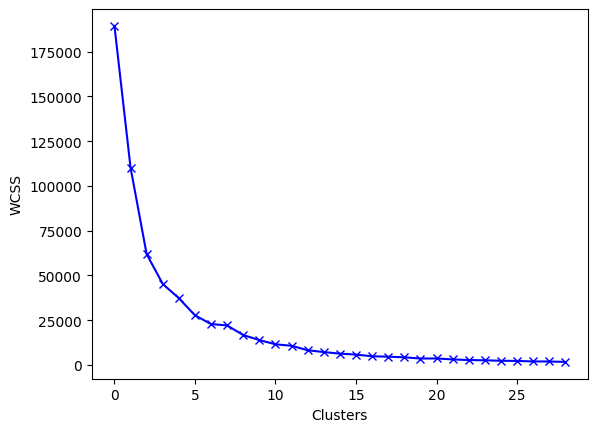

In [178]:
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [179]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [180]:
customer_info['cluster'] = kmeans.labels_
customer_info

,customer_unique_id,total_value,quant_orders,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,0
2,0000f46a3911fa3c0805444483337064,86.22,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,0
...,...,...,...,...
94682,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,2
94683,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,0
94684,ffff371b4d645b6ecea244b27531430a,112.46,1,0
94685,ffff5962728ec6157033ef9805bacc48,133.69,1,0


In [181]:
import seaborn as sb

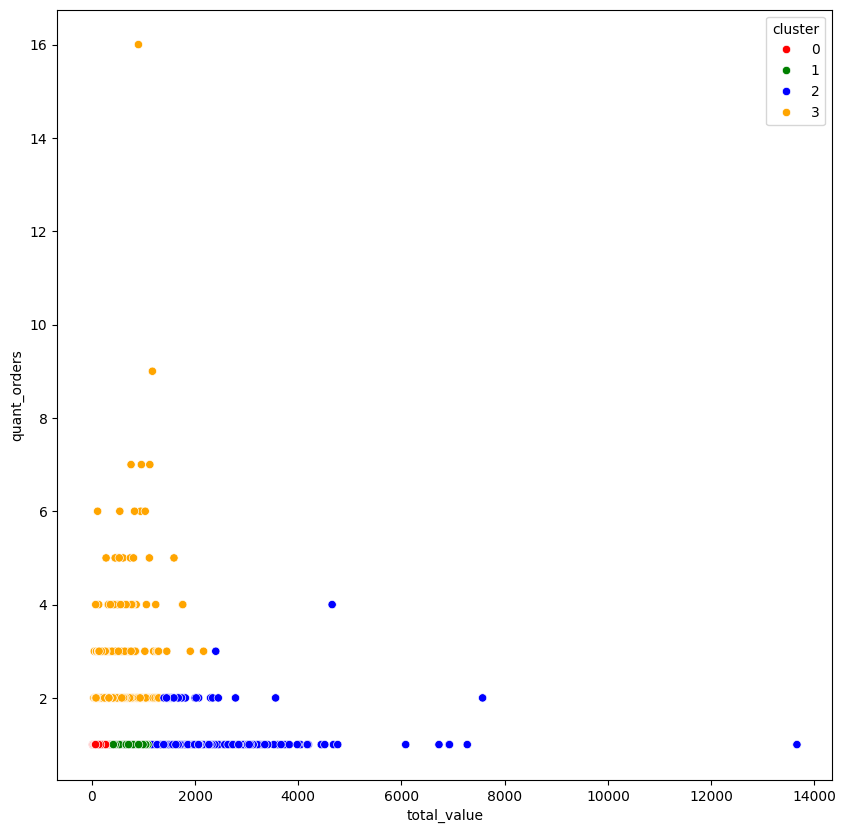

In [182]:
plt.figure(figsize=(10, 10))
ax = sb.scatterplot(x='total_value', y='quant_orders', hue='cluster', data = customer_info, palette= ['red','green','blue','orange'])
plt.show()

In [183]:
customer_info.to_csv('../data/processed/customers_cluster.csv')